##Exploratory Data Analysis



##Introduction

The dataset, a compilation of property listings regarding airbnb in seattlem WA state, underwent thorough exploration and analysis. Diverse visualizations like scatter plots, box plots, and heatmaps were employed to uncover correlations and patterns within the dataset. Relationships between attributes like 'price,' 'number_of_reviews,' 'property_type,' and 'room_type' were scrutinized to understand their impacts on listing features. The analyses provided valuable insights into pricing variations and guest review dynamics, offering a nuanced understanding of factors influencing the real estate and hospitality domains.

In [179]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the default figure size for Matplotlib plots
plt.rcParams['figure.figsize'] = [12, 6]

# Set the plotting context for Seaborn
sns.set_context('notebook')

# Set the maximum number of columns displayed in pandas DataFrames
pd.set_option('display.max_columns', 1000)

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
#import cleaned data from the data wrangling procedure
clean_df = pd.read_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/abnb_seattle.csv')

In [184]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Columns: 3132 entries, id to days_sincelast_review
dtypes: bool(18), float64(17), int64(3089), object(8)
memory usage: 162.2+ MB


In [185]:
clean_df.head()

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_NA,host_acceptance_rate_NA,host_response_rate_NA,bedrooms_NA,beds_NA,review_scores_rating_NA,review_scores_accuracy_NA,review_scores_cleanliness_NA,review_scores_checkin_NA,review_scores_communication_NA,review_scores_location_NA,review_scores_value_NA,reviews_per_month_NA,host_response_time_NA,first_review_NA,last_review_NA,amenities_ fast wifi \u2013 210 mbps],amenities_ bosch oven,amenities_ 65\ hdtv with amazon prime video,amenities_ frigidaire smooth-top electric stainless steel single oven,amenities_ paid parking lot on premises \u2013 10 spaces,amenities_ frigidaire single oven,amenities_ free residential garage on premises,amenities_ alba organics fragrance free shampoo,amenities_ stainless steel double oven,amenities_ frigidaire stainless steel oven,amenities_ bio silk conditioner,amenities_[paid parking garage on premises \u2013 100 spaces,amenities_ changing table,amenities_ common conditioner,amenities_ amazon hypoallergenic shampoo],amenities_ 42\ hdtv with apple tv,amenities_ electrolux stainless steel electric stove,amenities_ fast wifi \u2013 71 mbps,amenities_ alexa dot sound system,amenities_ children\u2019s books and toys,amenities_ ogx shampoo,amenities_[board games,amenities_ 4-burner miele stainless steel gas stove,amenities_ free parking garage on premises \u2013 4 spaces,amenities_ fllibretazzoni italia stainless steel double oven,amenities_ fast wifi \u2013 472 mbps,amenities_ 60\ hdtv with roku,amenities_ harry's body soap,amenities_ bbq grill,amenities_ ginger lily farms botanicals zeroderm advanced therapy moisturizing conditioner for all hair types,amenities_ viking electric stove,amenities_ insignia,amenities_ microwave,amenities_ roku],amenities_ l'occitane body soap,amenities_ 50\ hdtv with fire tv,amenities_ 60\ hdtv with standard cable,amenities_ kirkland signature liquid body wash,amenities_ 43\ hdtv with chromecast,amenities_ body wash and bar soap body soap,amenities_ fast wifi \u2013 65 mbps,amenities_ ivory spring,amenities_ ginger lily farms botanicals island tranquility nourishing body wash,amenities_ essentials,amenities_ children\u2019s books and toys for ages 0-2 years old,amenities_ wifi \u2013 46 mbps,amenities_ aromaland rosemary & mint shampoo,amenities_ pantene silicon-free conditioner conditioner,amenities_ naim muso 2 bluetooth sound system,amenities_ yamaha av receiver/hifi sound system with bluetooth and aux,amenities_ avanti refrigerator,amenities_ fisher paykel stainless steel induction stove,amenities_ 66\ hdtv with amazon prime video,amenities_ kirkland shampoo,amenities_[fast wifi \u2013 150 mbps,amenities_ 56\ tv with netflix,amenities_ summit refrigerator,amenities_ alexa device in the living room and on the tv sound system,amenities_ varies shampoo,amenities_ amazon conditioner,amenities_ 75\ tv with chromecast,amenities_ dove essentials body soap,amenities_ fast wifi \u2013 238 mbps,amenities_ 32\ hdtv with fire tv,amenities_ 24\ tv with fire tv,amenities_ 

##Price

1.1 What is the distribution of nightly price?

In [186]:
clean_df.price.describe()

count     6822.000000
mean       193.969657
std        275.428355
min         13.000000
25%        108.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64

In [187]:
median_price = clean_df['price'].median()
print("Median price:", median_price)


Median price: 150.0


In [188]:
# Calculate range
data_range = clean_df['price'].max() - clean_df['price'].min()
print("Range:", data_range)

# Calculate quartiles
Q1 = clean_df['price'].quantile(0.25)
Q2 = clean_df['price'].quantile(0.50)  # Same as the median
Q3 = clean_df['price'].quantile(0.75)

print("First Quartile (Q1):", Q1)
print("Second Quartile (Q2, Median):", Q2)
print("Third Quartile (Q3):", Q3)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)


Range: 9987.0
First Quartile (Q1): 108.0
Second Quartile (Q2, Median): 150.0
Third Quartile (Q3): 220.0
Interquartile Range (IQR): 112.0


In [189]:
# Check for null values in the 'price' column
null_values = clean_df['price'].isnull().any()

if null_values:
    print("The 'price' column contains null values.")
else:
    print("The 'price' column does not contain null values.")

The 'price' column does not contain null values.


The median price is 150. The distribution is highly right-skewed, with the maximum price of $10000.
Becase of the extreme values, it may be more appropriate to apply log transformation to the price and evaluate its distribution.

The 'clean_df' dataset contains 6822 entries of property prices:

- **Average Price:** Approximately \$194
- **Variability:** Prices range from \$13 to \$10,000, with a middle spread of $112 (IQR: Interquartile Range).

In [190]:
# #If there was 0 price values, need to drop
# drop_index = df[df.price==0].index
# for idx in drop_index:
#     df.drop(idx,axis=0,inplace=True)


### Create column log price for conveninet analysis

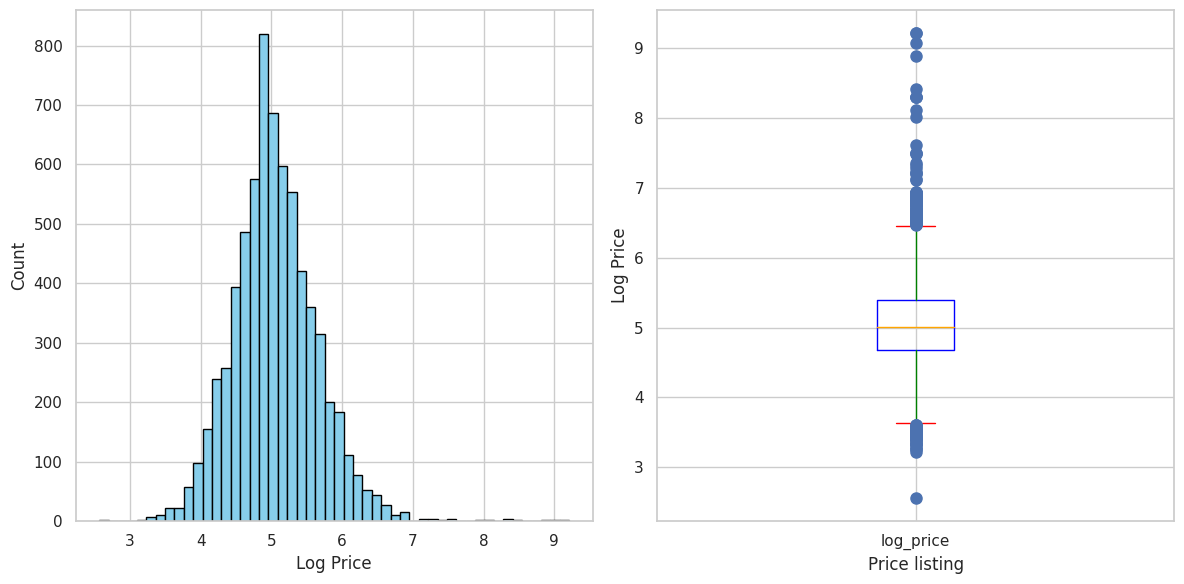

In [191]:
import numpy as np
import matplotlib.pyplot as plt

clean_df['log_price'] = np.log(clean_df['price'])

plt.subplot(1, 2, 1)
clean_df['log_price'].hist(bins=50, color='skyblue', edgecolor='black')  # Customize histogram colors
plt.xlabel('Log Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
boxprops = dict(color='blue')  # Customize box plot outline color
medianprops = dict(color='orange')  # Customize median line color
whiskerprops = dict(color='green')  # Customize whiskers color
capprops = dict(color='red')  # Customize caps color
flierprops = dict(marker='o', markerfacecolor='red', markersize=8)  # Customize outliers

clean_df['log_price'].plot.box(sym='b', boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
plt.ylabel('Log Price')
plt.xlabel('Price listing')

plt.tight_layout()
plt.show()


In [192]:
import numpy as np

# Assuming already created the 'log_price' column in your DataFrame
# clean_df['log_price'] = np.log(clean_df['price'])

Q1 = clean_df['log_price'].quantile(0.25)
Q2 = clean_df['log_price'].quantile(0.50)  # Same as the median
Q3 = clean_df['log_price'].quantile(0.75)

IQR = Q3 - Q1

print("First Quartile (Q1) of log price:", Q1)
print("Median (Q2) of log price:", Q2)
print("Third Quartile (Q3) of log price:", Q3)
print("Interquartile Range (IQR) of log price:", IQR)


First Quartile (Q1) of log price: 4.68213122712422
Median (Q2) of log price: 5.0106352940962555
Third Quartile (Q3) of log price: 5.393627546352362
Interquartile Range (IQR) of log price: 0.711496319228142


Outliers: Any data points that fall beyond the ends of the whiskers are considered outliers. They are typically marked as circles or other symbols on the plot.There are two main criteria for identifying outliers in a box plot:

--->1.5 IQR rule: This rule states that any data point that is more than 1.5 times the IQR away from either Q1 or Q3 is considered an outlier.

---->Tukey's fences: This method uses slightly different criteria, based on the idea that outliers should be more than three times the IQR away from either Q1 or Q3.

It's important to note that not all outliers are necessarily errors or mistakes. Sometimes, they can be valid data points that simply fall outside the typical range of the data. However, it's important to investigate outliers to understand why they occur and how they might affect the analysis of the data.

The histogram (left) shows that the log price is slightly right skewed. The boxplot (right) shows that most of the outliers are above 1.5x of the inter-quartile range (IQR).

##Property Information

In [193]:
#Create a function for count and percentage for categorical variables

def count_pct(variable, data=clean_df):
    idx = data[variable].value_counts().index
    count_pct_dict = {'count': data[variable].value_counts(dropna=False).values,
                      'pct':data[variable].value_counts(dropna=False).values/data.shape[0]*100}
    return pd.DataFrame(count_pct_dict,index=idx)

In [194]:
property_type_counts = count_pct(variable = 'property_type')
property_type_counts

,count,pct
Entire home,1741,25.520375
Entire rental unit,1690,24.772794
Private room in home,685,10.041044
Entire guest suite,601,8.809733
Entire condo,549,8.047493
Entire townhouse,530,7.768983
Entire guesthouse,267,3.913808
Entire serviced apartment,154,2.257403
Private room in townhouse,111,1.627089
Private room in rental unit,79,1.158018


In [195]:
len(clean_df.property_type.unique()), (property_type_counts['count'] <= 10).sum()

(51, 30)

Overall, there are 51 different property types.
The most common ones are: Entire home (25%), Entire rental unit (24%), and private room in home (10%).
There are 30 property types that have count of 10 or fewer.

## Relation of Property type with listing price

In [196]:
# create and index so for ordering the boxplots according to counts
idx = clean_df.property_type.value_counts().index

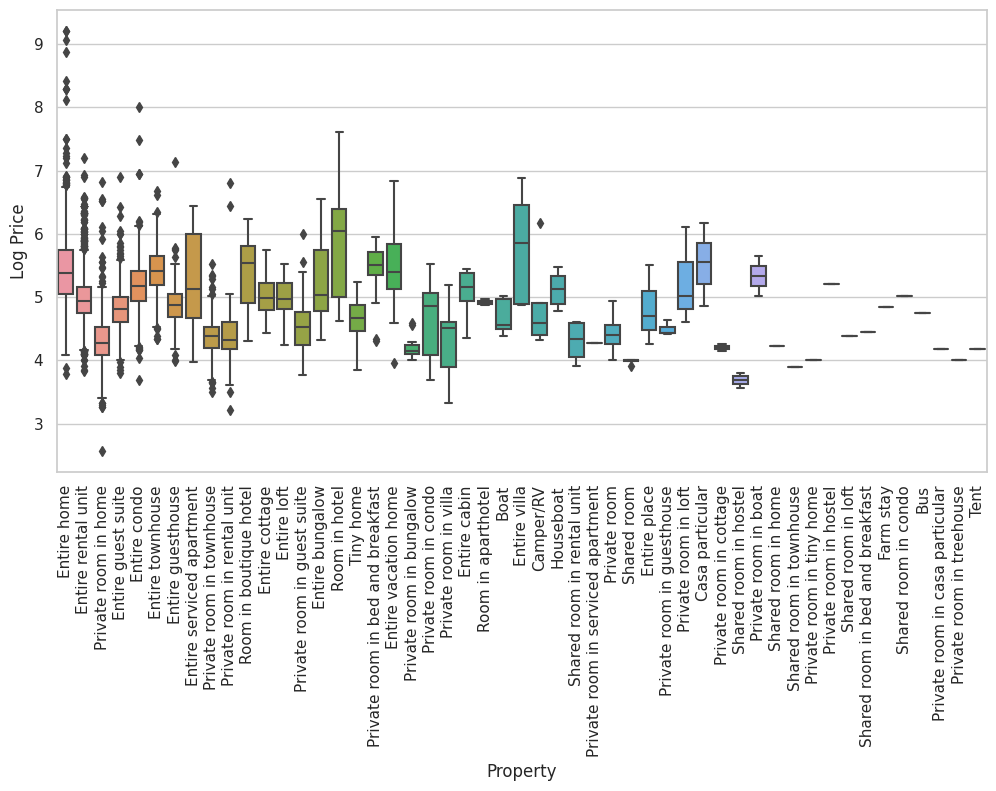

In [197]:
# create and index so for ordering the boxplots according to counts
idx = clean_df.property_type.value_counts().index
g = sns.boxplot(data=clean_df, x='property_type', y='log_price',order=idx)
g.set(ylabel ='Log Price', xlabel='Property')
plt.xticks(rotation=90);

At this detailed level, drawing conclusions becomes challenging due to the small number of listings in numerous categories. To simplify, the analysis focuses on categories with a substantial count of listings.

In [198]:
# Set threshold to be 3% of total number of listing; only property type higher than threshold will be considered
threshold = 3
top_property_type = property_type_counts[property_type_counts.pct > threshold].index
df_top_property_type = clean_df.loc[clean_df.property_type.apply(lambda x: x in top_property_type),['property_type','log_price','room_type']]


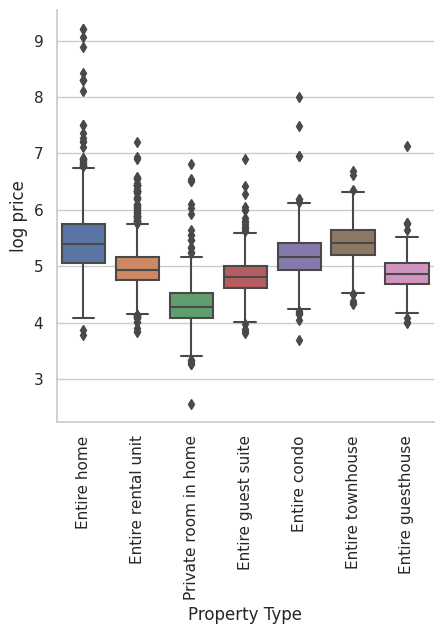

In [199]:
g = sns.catplot(data=df_top_property_type, x='property_type',y='log_price',kind='box',order =top_property_type)
g.set(xlabel = 'Property Type', ylabel='log price')
plt.xticks(rotation = 90);

Entire home and entite town house has the highest median price, while private room in home has the lowest median price.

##Available room types

In [200]:
room_type_counts = count_pct('room_type')
room_type_counts

,count,pct
Entire home/apt,5727,83.948989
Private room,1079,15.816476
Shared room,16,0.234535


Among the three room types, approximately 83% represent entire homes or apartments, around 15% signify private rooms, and shared rooms comprise less than 0.3%

###Distribution of room type among the top property types

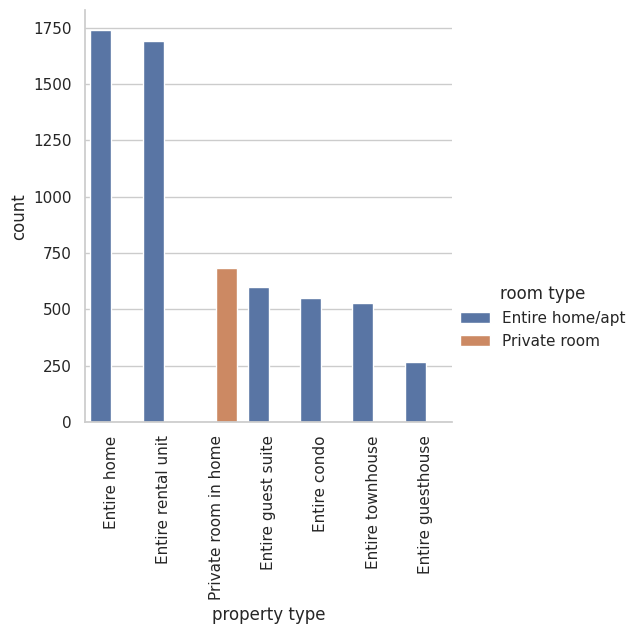

In [201]:
g = sns.catplot(data=df_top_property_type, x='property_type',hue='room_type',kind='count',order=top_property_type)
g._legend.set_title('room type')
g.set(xlabel='property type')
plt.xticks(rotation=90);

Entite home and Entire remtal unit has the majority room type is the entire home/apt.

2.3.2.c. How does room type affect price?

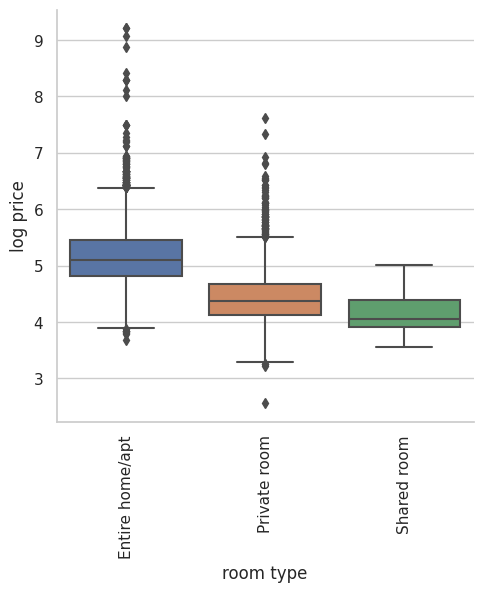

In [202]:
g = sns.catplot(data=clean_df, x='room_type', y='log_price',kind='box')
g.set(xlabel='room type',ylabel='log price')
plt.xticks(rotation=90);

As expected, the price is the highest for renting the entire unit, followed by private room. The price for shared room is generally the lowest.




##Distribution of number of accommodates

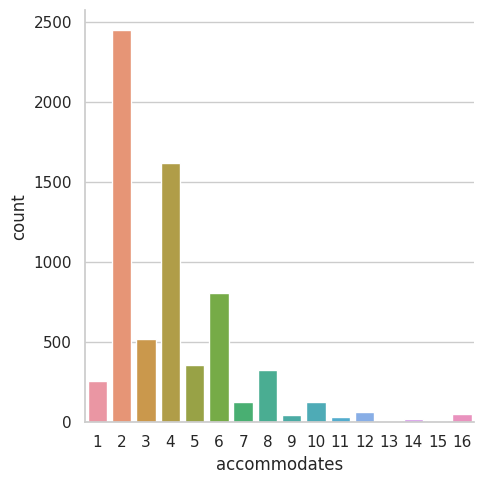

In [203]:
sns.catplot(data=clean_df,x='accommodates',kind='count');

The most common number of accommodates is 2, and the maximum value is 16.

##Price related to the number of accommodates

[Text(0, 0.5, 'log price')]

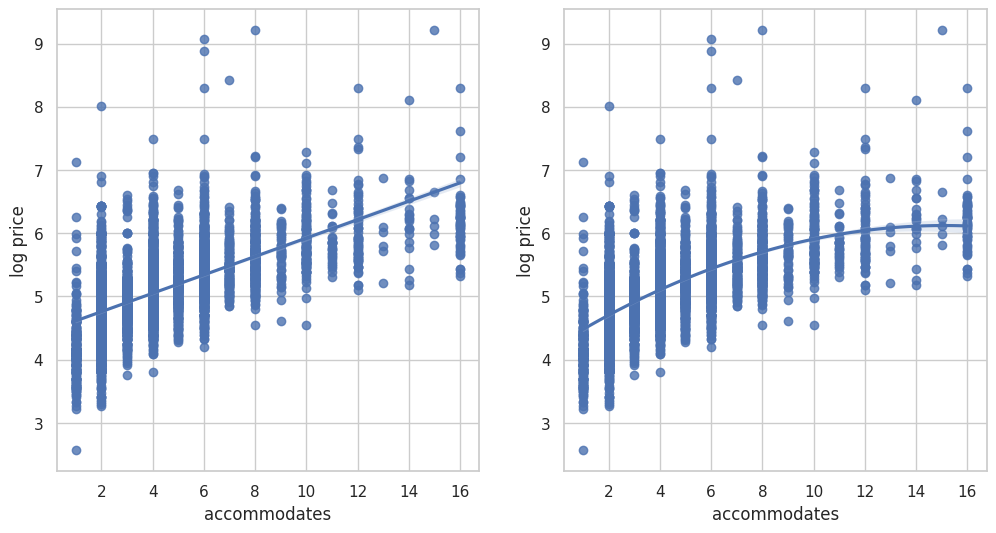

In [204]:
plt.subplot(1,2,1)
g = sns.regplot(data=clean_df, x='accommodates',y='log_price', order=1);
g.set(ylabel='log price')
plt.subplot(1,2,2)
g = sns.regplot(data=clean_df, x='accommodates',y='log_price', order=2);
g.set(ylabel='log price')

It appears that the logarithmic price tends to rise in correlation with the number of accommodations. However, the left graph indicates a non-linear increase. On the right graph, a second-order regression line fitted to the data depicts a gradual rise in the logarithmic price with accommodates until approximately 12. Beyond this point, the logarithmic price begins to plateau.

Most 20 common amenities

In [205]:
# Identify columns containing 'amenities_'
amenities_col_list = clean_df.columns[list(map(lambda x: True if "amenities_" in x else False, clean_df.columns))]

# Sum the columns containing 'amenities_' and find the top 20 most common amenities
top_20_amenities = clean_df[amenities_col_list].sum().sort_values(ascending=False)[:20]
print(top_20_amenities)


amenities_ essentials               6421
amenities_ carbon monoxide alarm    6398
amenities_ smoke alarm              6214
amenities_ kitchen                  6114
amenities_ hair dryer               6004
amenities_ hangers                  5984
amenities_ hot water                5878
amenities_ microwave                5627
amenities_ dishes and silverware    5573
amenities_ bed linens               5537
amenities_ cooking basics           5516
amenities_ iron                     5501
amenities_ refrigerator             5447
amenities_ self check-in            5446
amenities_ wifi]                    5242
amenities_ fire extinguisher        5034
amenities_ dedicated workspace      4577
amenities_ private entrance         4409
amenities_ heating                  4402
amenities_ first aid kit            4317
dtype: int64


2.3.4.b What are the least common 20 amenities?

In [206]:
# Identify columns containing 'amenities_'
amenities_col_list = clean_df.columns[list(map(lambda x: True if "amenities_" in x else False, clean_df.columns))]

# Sum the columns containing 'amenities_' and find the least common 20 amenities
bottom_20_amenities = clean_df[amenities_col_list].sum().sort_values(ascending=True)[:20]
print(bottom_20_amenities)


amenities_ fast wifi \u2013 210 mbps]                                       1
amenities_ samsung  oven                                                    1
amenities_ cafe appliance double oven                                       1
amenities_ natural products  body soap                                      1
amenities_ oregon soap co. body soap                                        1
amenities_ two wireless bluetooth speakers  bluetooth sound system          1
amenities_ olay extra moisture                                              1
amenities_ amazon echo studio bluetooth sound system                        1
amenities_ 32\ tv with dvd player                                           1
amenities_ bio silk  shampoo                                                1
amenities_ gluten                                                           1
amenities_ 35\ hdtv with standard cable                                     1
amenities_ salon quality. conditioner                           

What amenities lead to the largest change in median price?

In [207]:
df_amenities = pd.DataFrame(columns=['with_amenities_count', 'with_amenities_price',
                                     'without_amenities_count', 'without_amenities_price'])

for item in amenities_col_list:
    df_amenities.loc[item] = [
        clean_df.loc[clean_df[item] == 1, 'price'].count(),
        clean_df.loc[clean_df[item] == 1, 'price'].median(),
        clean_df.loc[clean_df[item] == 0, 'price'].count(),
        clean_df.loc[clean_df[item] == 0, 'price'].median()
    ]

df_amenities['difference'] = df_amenities['with_amenities_price'] - df_amenities['without_amenities_price']


In [208]:
df_amenities.sort_values(by='difference', ascending=False)[:10]

,with_amenities_count,with_amenities_price,without_amenities_count,without_amenities_price,difference
amenities_ wolf stainless steel double oven,1.0,1449.0,6821.0,150.0,1299.0
amenities_ 90\ hdtv with apple tv,1.0,1449.0,6821.0,150.0,1299.0
amenities_ ski-in/ski-out \u2013 near ski lifts,1.0,1349.0,6821.0,150.0,1199.0
amenities_ lacanche - french premium range gas stove,1.0,967.0,6821.0,150.0,817.0
amenities_ 6 burner bertazonni with electric convection range stainless steel gas stove,1.0,944.0,6821.0,150.0,794.0
amenities_ game console: nintendo wii and xbox 360,1.0,944.0,6821.0,150.0,794.0
amenities_ fast wifi \u2013 666 mbps,1.0,944.0,6821.0,150.0,794.0
amenities_ 44\ hdtv with disney+,1.0,875.0,6821.0,150.0,725.0
amenities_ viking and gaggenau stainless steel oven,1.0,850.0,6821.0,150.0,700.0
amenities_[golf course view,2.0,818.0,6820.0,150.0,668.0


amenities_ wolf stainless steel double oven,
amenities_ 90\ hdtv with apple tv, and
amenities_ ski-in/ski-out \u2013 near ski lifts leads to the highest increase in median price

### Host Information

What fraction of listings are provided by superhosts?

Superhost is a status granted by Airbnb to hosts for their proven track records of providing extraordinary services to customers.

In [209]:
superhost_count_pct = count_pct('host_is_superhost')
superhost_count_pct


,count,pct
False,3670,53.796541
True,3152,46.203459


About 46% of listings are provided by superhost. It is important to note that a host can provide multiple listings.

 Are the prices different between the superhost and non-superhost?

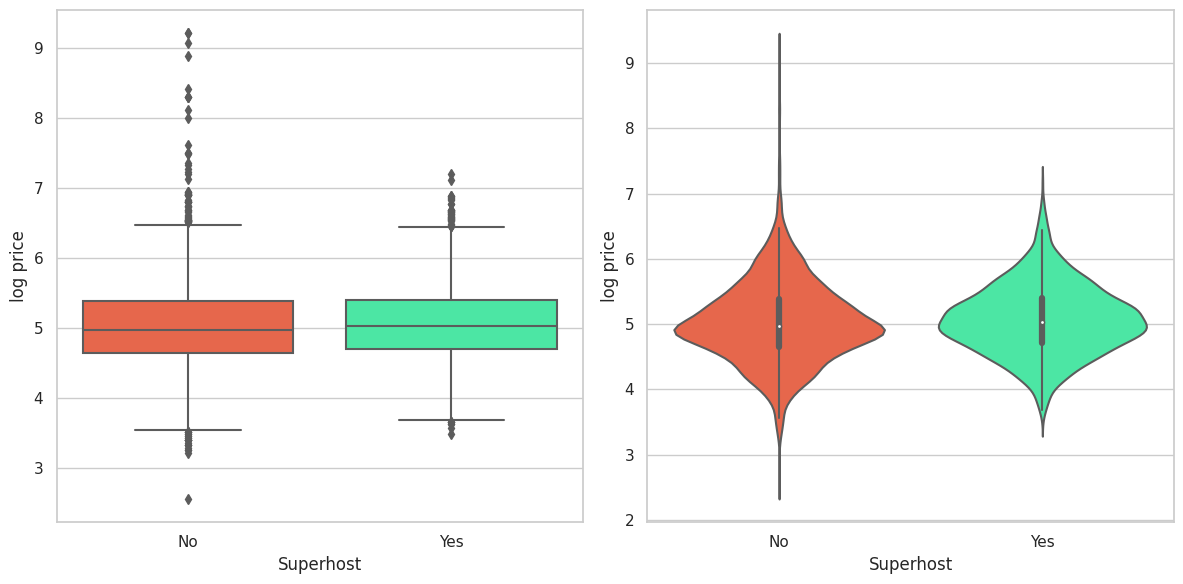

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ['#FF5733', '#33FFA8']  # Replace with your desired colors

plt.figure(figsize=(12, 6))

# Boxplot with custom color palette
plt.subplot(1, 2, 1)
sns.boxplot(data=clean_df, x='host_is_superhost', y='log_price', palette=custom_palette)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Superhost')
plt.ylabel('log price')

# Violinplot with custom color palette
plt.subplot(1, 2, 2)
sns.violinplot(data=clean_df, x='host_is_superhost', y='log_price', palette=custom_palette)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Superhost')
plt.ylabel('log price')

plt.tight_layout()
plt.show()

The median price for listings offered by superhost is slightly higher. Yet, the listings with the highest prices are owned by non-superhosts.

### Distribution of the the response time

In [211]:
df_host_response_time = count_pct('host_response_time')
df_host_response_time

,count,pct
within an hour,5896,86.426268
within a few hours,636,9.322779
within a day,232,3.400762
a few days or more,58,0.850191


Close to 85% of listings are posted by hosts that reply within an hour of inquiry.

##host response time related to price

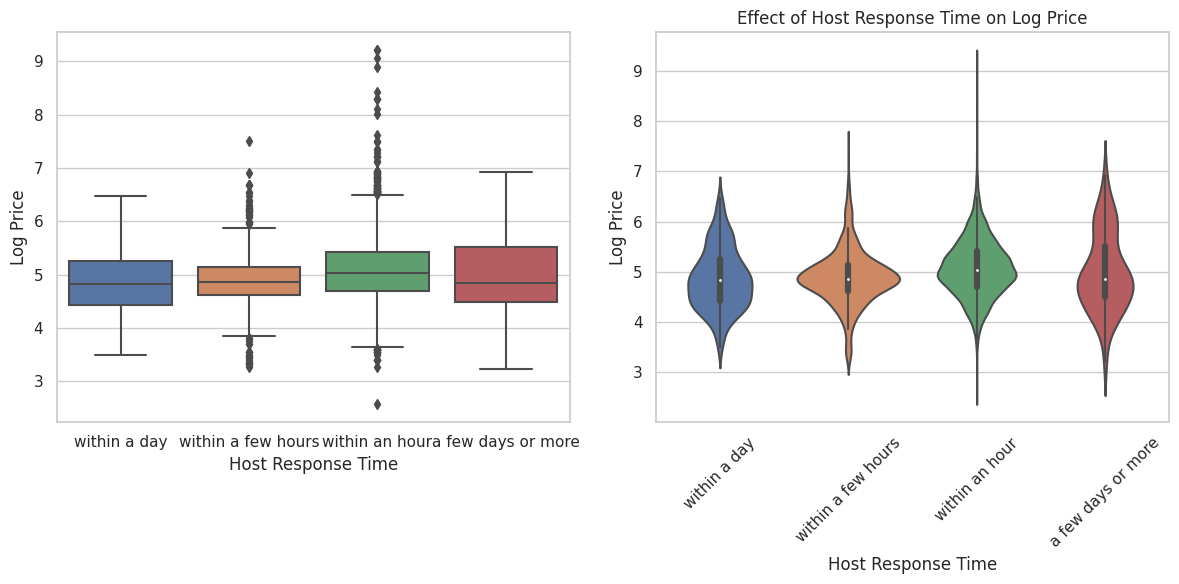

In [212]:
plt.subplot(1,2,1)
g = sns.boxplot(data=clean_df, x='host_response_time',y='log_price')
plt.xlabel('Host Response Time')
plt.ylabel('Log Price');

plt.subplot(1,2,2)
sns.violinplot(data=clean_df, x='host_response_time', y='log_price')
plt.xlabel('Host Response Time')
plt.ylabel('Log Price')
plt.title('Effect of Host Response Time on Log Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The host response time seem to relate to the price.

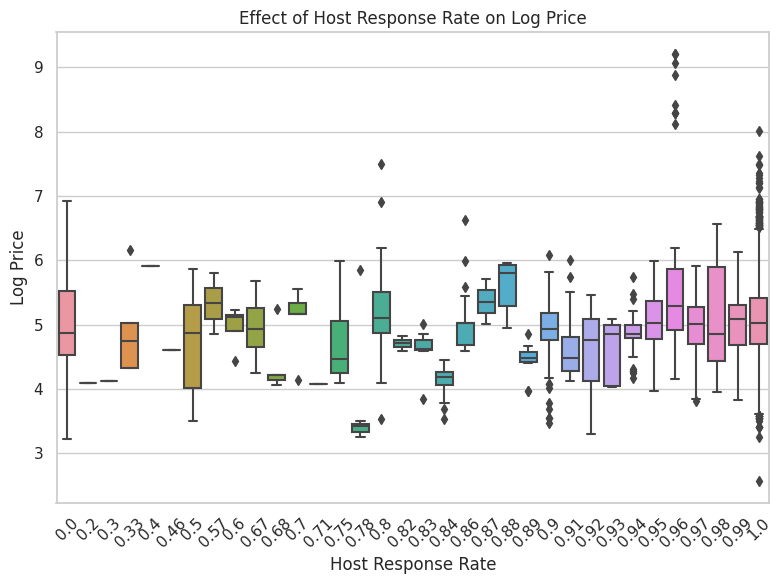

In [213]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='host_response_rate', y='log_price')
plt.xlabel('Host Response Rate')
plt.ylabel('Log Price')
plt.title('Effect of Host Response Rate on Log Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The host response rate does not seem to relate to the price strongly.

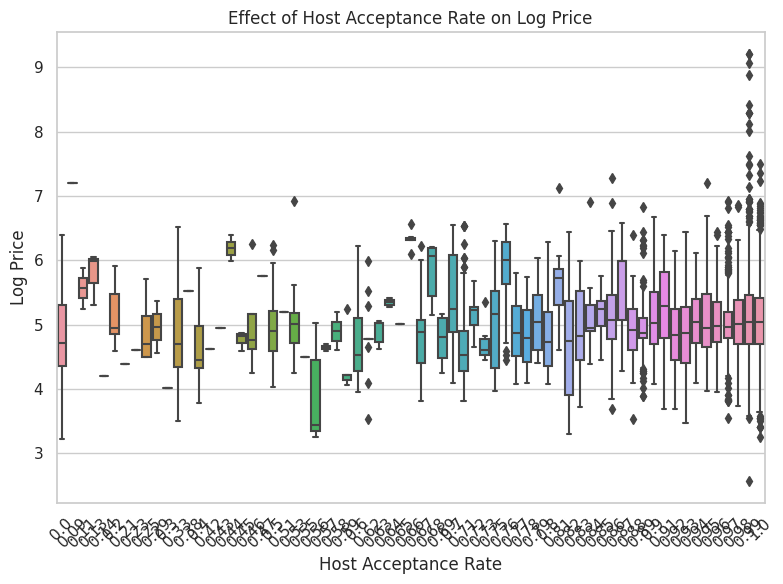

In [214]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='host_acceptance_rate', y='log_price')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Log Price')
plt.title('Effect of Host Acceptance Rate on Log Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


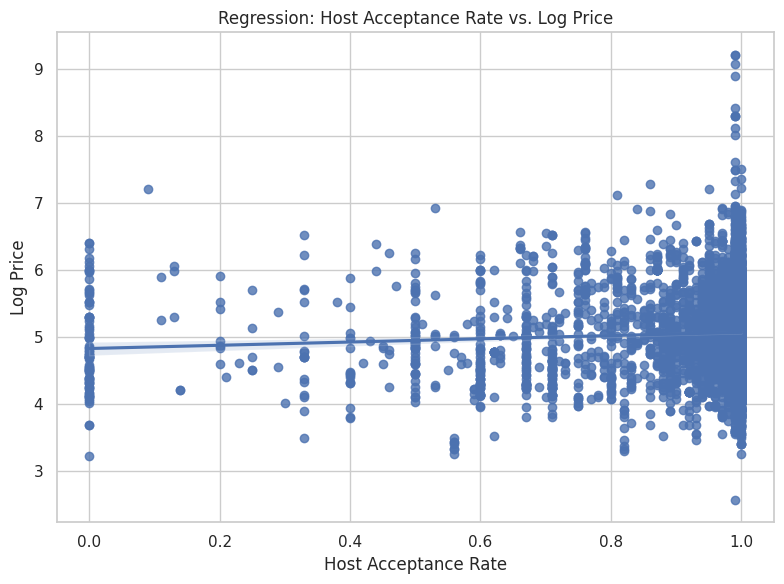

In [215]:
plt.figure(figsize=(8, 6))
sns.regplot(data=clean_df, x='host_acceptance_rate', y='log_price')
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Log Price')
plt.title('Regression: Host Acceptance Rate vs. Log Price')
plt.tight_layout()
plt.show()


In [216]:
# Find columns starting with 'cleaning'
cleaning_columns = clean_df.filter(regex='^cleaning', axis=1)

# Check if columns exist and print them
if not cleaning_columns.empty:
    print("Columns starting with 'cleaning':")
    print(cleaning_columns.columns.tolist())
else:
    print("No columns starting with 'cleaning' found.")


No columns starting with 'cleaning' found.


### Number of guests/accommodate included related to price

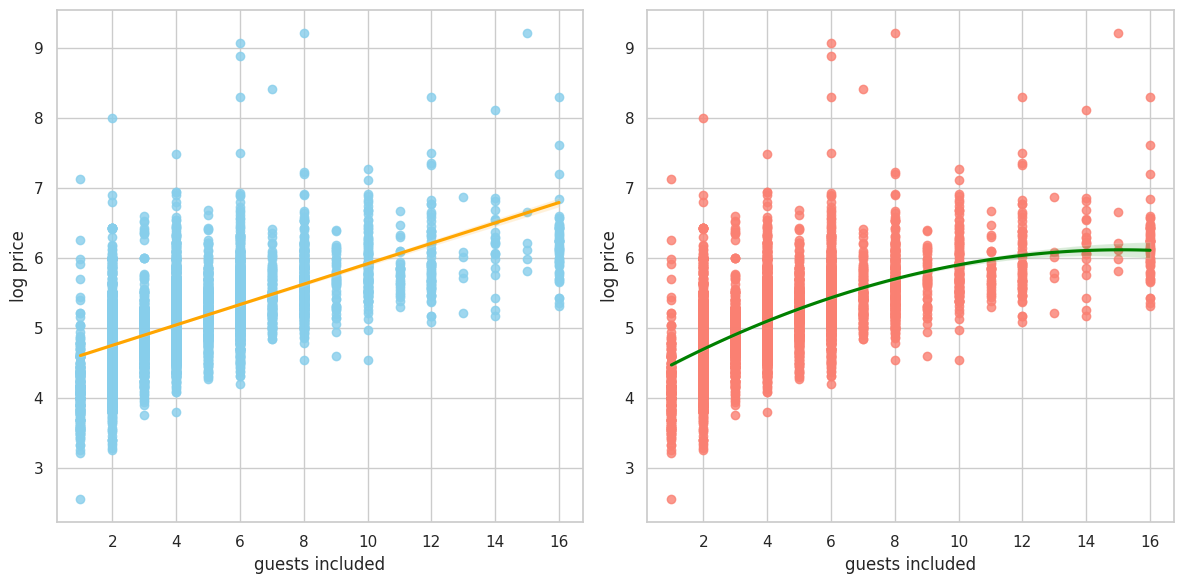

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Subplot 1 with order=1
plt.subplot(1, 2, 1)
sns.regplot(data=clean_df, x='accommodates', y='log_price', order=1, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.xlabel('guests included')
plt.ylabel('log price')

# Subplot 2 with order=2
plt.subplot(1, 2, 2)
sns.regplot(data=clean_df, x='accommodates', y='log_price', order=2, scatter_kws={'color': 'salmon'}, line_kws={'color': 'green'})
plt.xlabel('guests included')
plt.ylabel('log price')

plt.tight_layout()
plt.show()

###Distribution of minimum nights of stay

In [218]:
clean_df.minimum_nights.describe()

count    6822.000000
mean       11.639842
std        21.164639
min         1.000000
25%         2.000000
50%         2.000000
75%        30.000000
max       700.000000
Name: minimum_nights, dtype: float64

In [219]:
print(f'Number of unique minimum nights is {len(clean_df.minimum_nights.unique())}')

Number of unique minimum nights is 49


In [220]:
print(f'Percentage of minimum nights 7 days or less is {(clean_df.minimum_nights <=7).sum()/clean_df.shape[0]*100:.3}')


Percentage of minimum nights 7 days or less is 69.0


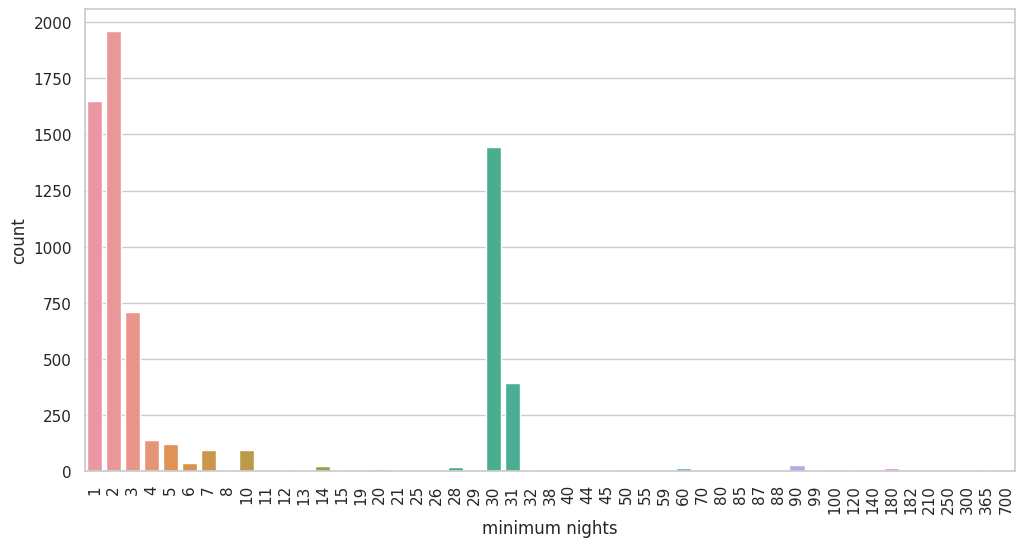

In [221]:
sns.countplot(data=clean_df, x='minimum_nights')
plt.xticks(rotation=90)
plt.xlabel('minimum nights')
plt.ylabel('count');

##Minimum nights of stay related to price

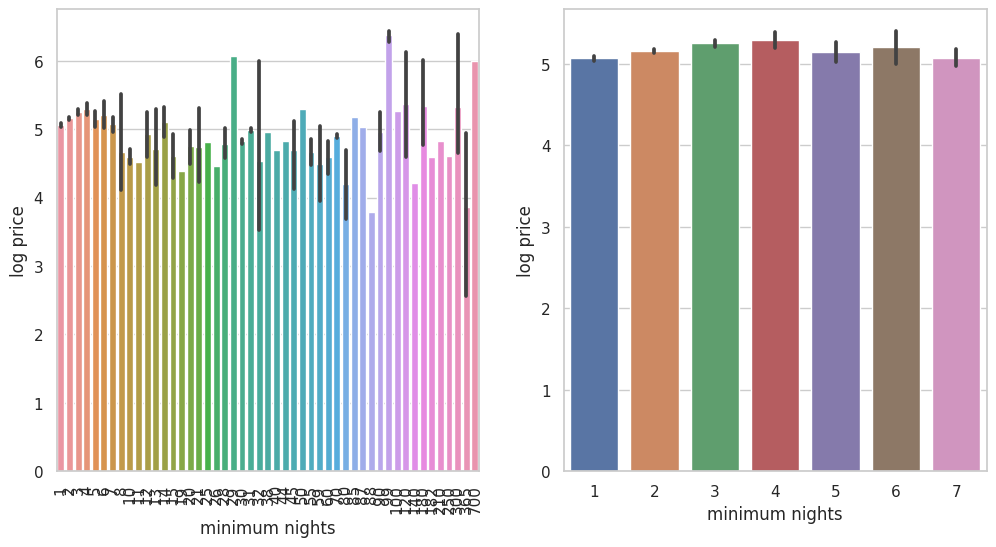

In [222]:
plt.subplot(1,2,1)
sns.barplot(data=clean_df, x='minimum_nights',y='log_price')
plt.xlabel('minimum nights')
plt.ylabel('log price')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=clean_df[clean_df.minimum_nights <=7], x='minimum_nights',y='log_price')
plt.xlabel('minimum nights')
plt.ylabel('log price');

The bar plot on the left depicts log prices across various minimum stay durations. No clear pattern emerges, but it's important to note the limited data availability for longer stays.

On the right, there's a distinct median log price difference between stays of 1 and 7 nights. However, the relationship doesn't follow a linear trend.

## Review score ratings

Distribution of review score ratig

In [223]:
clean_df.review_scores_rating.describe()

count    6822.000000
mean        4.801642
std         0.349067
min         0.000000
25%         4.780000
50%         4.890000
75%         4.960000
max         5.000000
Name: review_scores_rating, dtype: float64

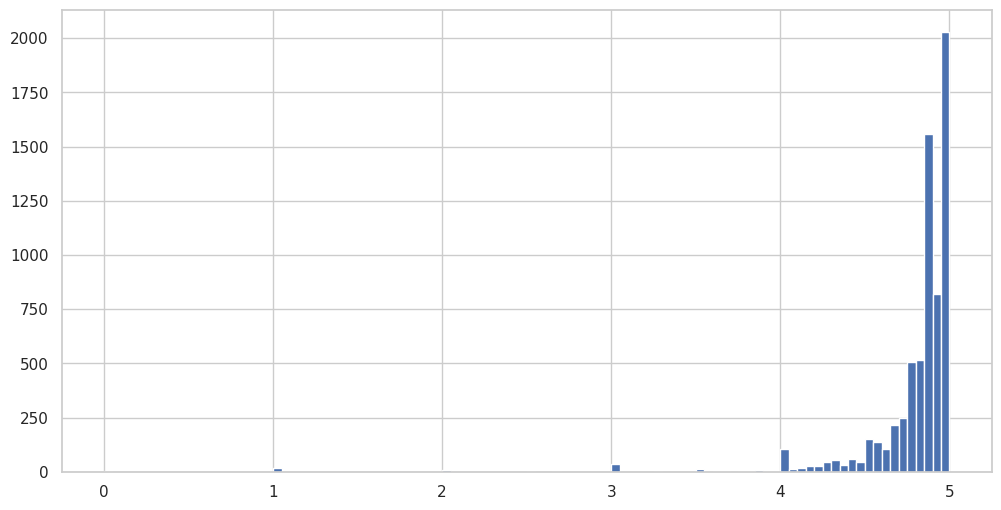

In [224]:
clean_df.review_scores_rating.hist(bins=100);


the highest and lowest review score ratings are 5 and 1, respectively.

The review score ratings are top heavy, with 75% of data 4.5 or higher.

## Is there a difference in review score between superhost and non-superhost?

<Figure size 800x600 with 0 Axes>

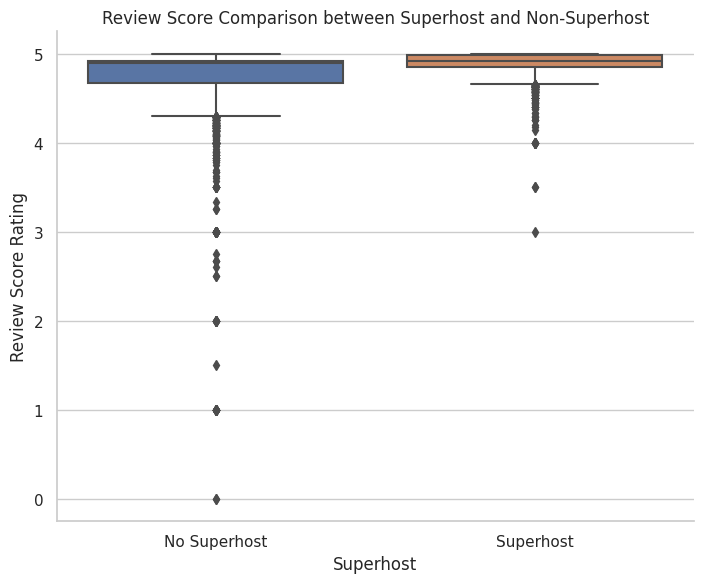

In [225]:
plt.figure(figsize=(8, 6))

# Create the catplot
g = sns.catplot(data=clean_df, y='review_scores_rating', x='host_is_superhost', kind='box', height=6, aspect=1.2)
g.set_axis_labels('Superhost', 'Review Score Rating')
g.set_xticklabels(['No Superhost', 'Superhost'])

plt.title('Review Score Comparison between Superhost and Non-Superhost')

plt.tight_layout()
plt.show()


The observation suggests that there are more extreme values, or outliers, in the review score ratings for non-superhost listings. These outliers indicate instances where non-superhost properties tend to have lower review score ratings compared to superhost properties. In simpler terms, non-superhost listings often exhibit more variability in their review scores, with some notably lower ratings compared to those of superhost listings.

###Price related to review score ratings

<Figure size 800x600 with 0 Axes>

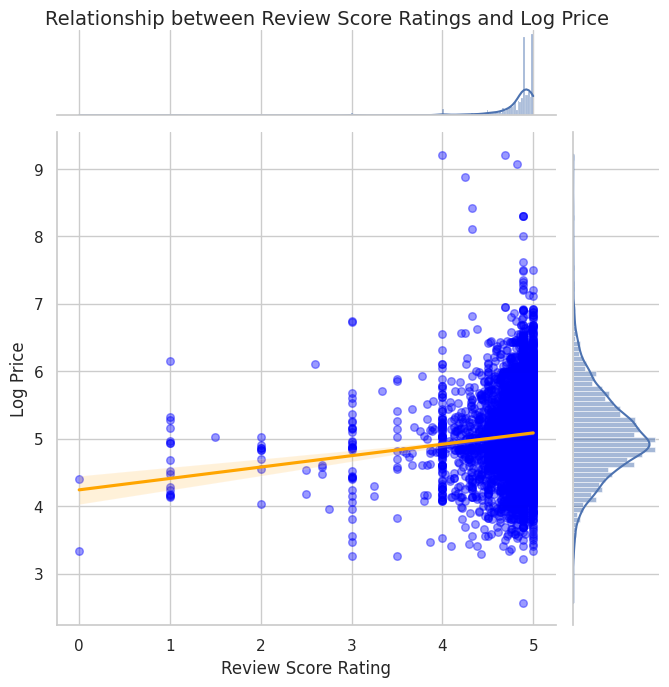

In [226]:
plt.figure(figsize=(8, 6))

# Create a jointplot with customized aesthetics
sns.set(style="whitegrid")
joint = sns.jointplot(data=clean_df, y='log_price', x='review_scores_rating', kind='reg', height=7,
                      scatter_kws={'alpha': 0.4, 's': 30, 'color': 'blue'},
                      line_kws={'color': 'orange'})

# Customizing labels and titles
joint.set_axis_labels('Review Score Rating', 'Log Price', fontsize=12)
plt.subplots_adjust(top=0.95)
joint.fig.suptitle('Relationship between Review Score Ratings and Log Price', fontsize=14)

plt.show()


In [227]:
# plt.figure(figsize=(8, 6))

# # Create a jointplot with regression line
# sns.jointplot(data=clean_df, y='log_price', x='review_scores_rating', kind='reg', height=7)
# plt.xlabel('Review Score Rating')
# plt.ylabel('Log Price')

# plt.show()

This jointplot combines a scatter plot with both histograms and a regression line. It allows for a clearer view of the relationship between review score ratings and log price, showcasing the trend and distribution of the data. Adjust the height or other parameters as needed for better visualization.

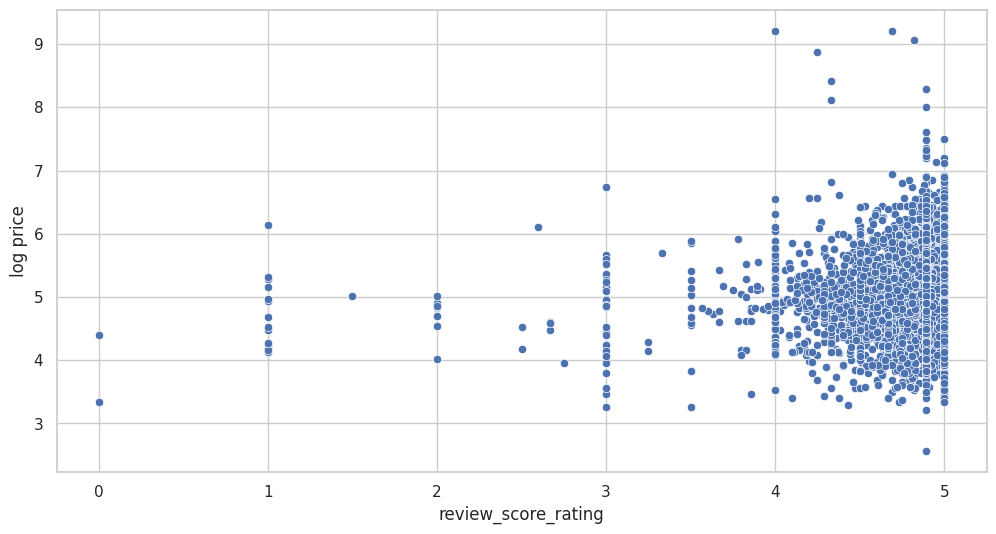

In [228]:
sns.scatterplot(data=clean_df,y='log_price',x='review_scores_rating')
plt.xlabel('review_score_rating')
plt.ylabel('log price');

There seems to be no obvious relationship between price and review score rating.

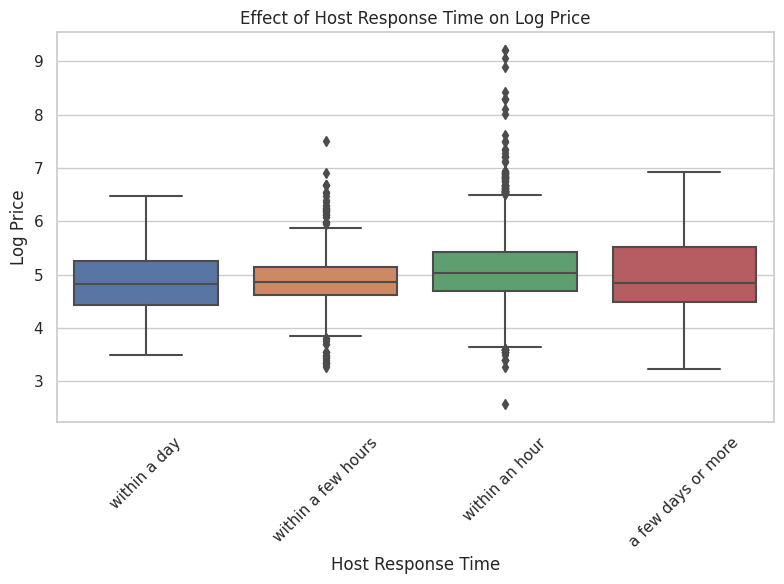

In [229]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='host_response_time', y='log_price')
plt.xlabel('Host Response Time')
plt.ylabel('Log Price')
plt.title('Effect of Host Response Time on Log Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It looks like host response time within an hour has higher listing price

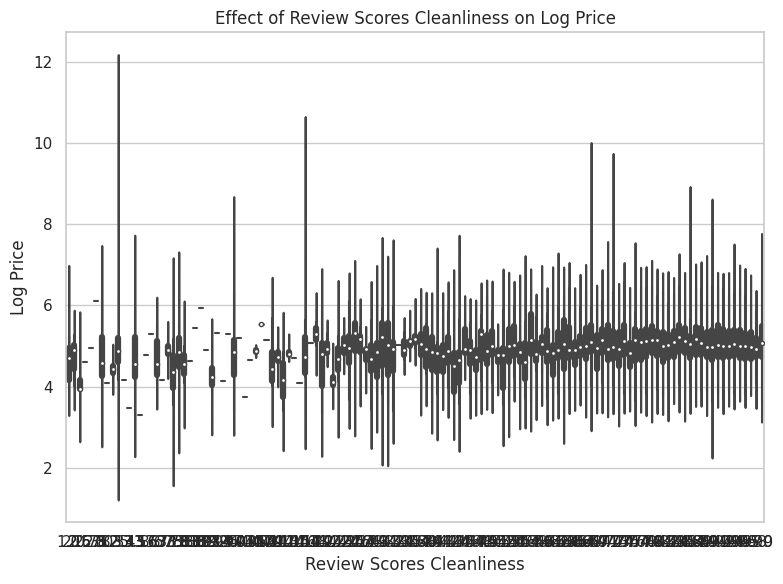

In [230]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=clean_df, x='review_scores_cleanliness', y='log_price')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Log Price')
plt.title('Effect of Review Scores Cleanliness on Log Price')
plt.tight_layout()
plt.show()


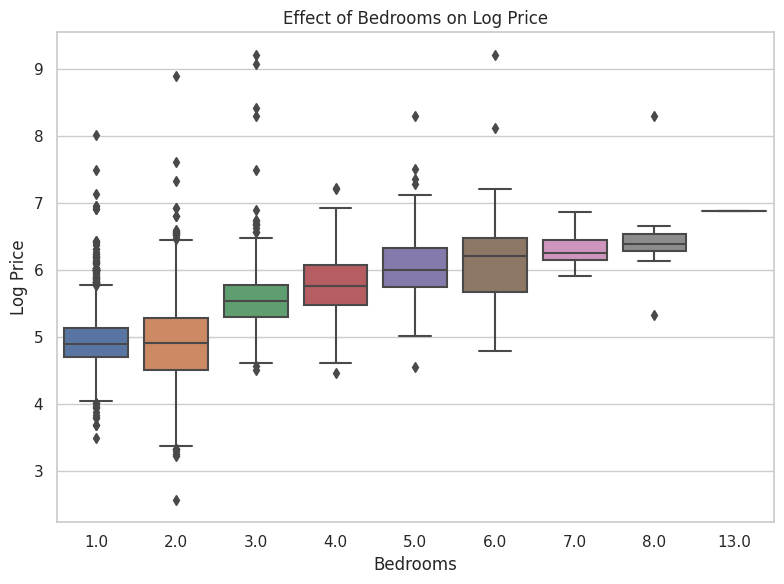

In [231]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='bedrooms', y='log_price')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')
plt.title('Effect of Bedrooms on Log Price')
plt.tight_layout()
plt.show()


Obviously higher number of bedrooms higher the listing prices

<ipython-input-232-cb52199ba15d>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


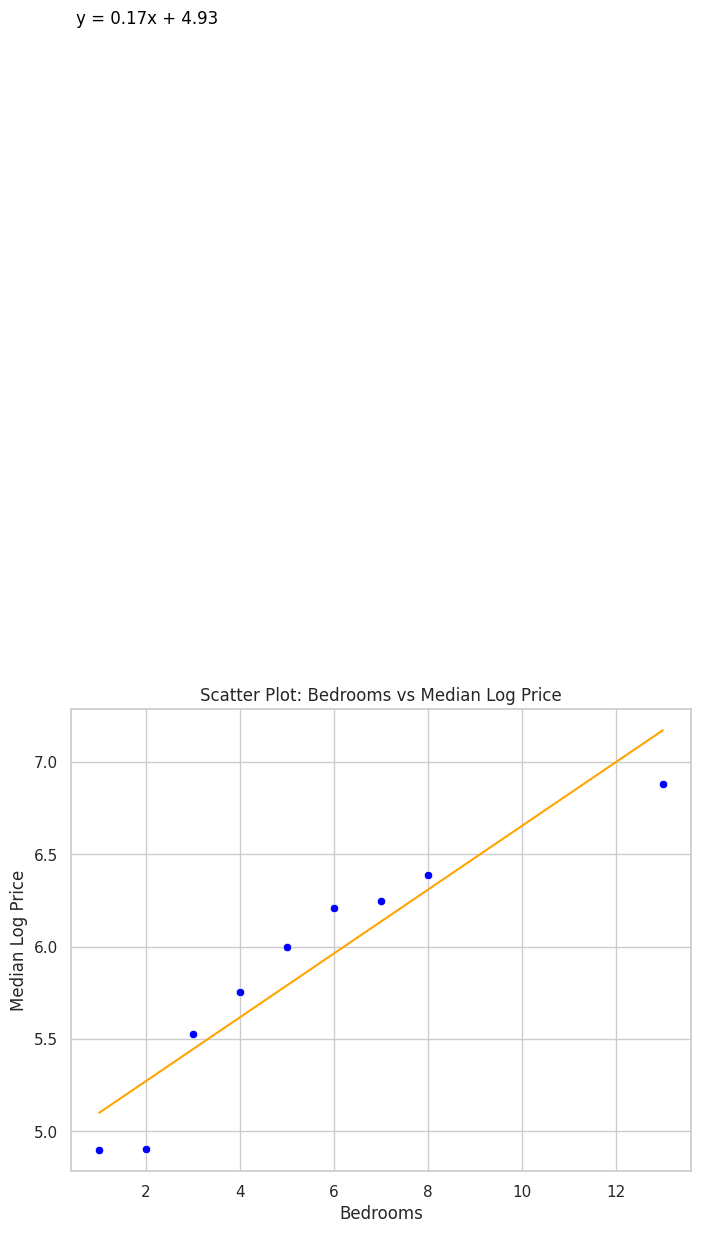

In [232]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median log price for each 'bedrooms' value
median_log_price = clean_df.groupby('bedrooms')['log_price'].median().reset_index()

# Scatter plot of 'bedrooms' against median log price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=median_log_price, x='bedrooms', y='log_price', color='blue')
plt.xlabel('Bedrooms')
plt.ylabel('Median Log Price')
plt.title('Scatter Plot: Bedrooms vs Median Log Price')

# Add regression line and equation
regression = np.polyfit(median_log_price['bedrooms'], median_log_price['log_price'], 1)
plt.plot(median_log_price['bedrooms'], np.polyval(regression, median_log_price['bedrooms']), color='orange')

# Add equation to the plot
equation = f'y = {regression[0]:.2f}x + {regression[1]:.2f}'
plt.text(0.5, 11, equation, fontsize=12, color='black')

plt.tight_layout()
plt.show()


Shows the positive correlation of the bedrooms with median value of listing prices

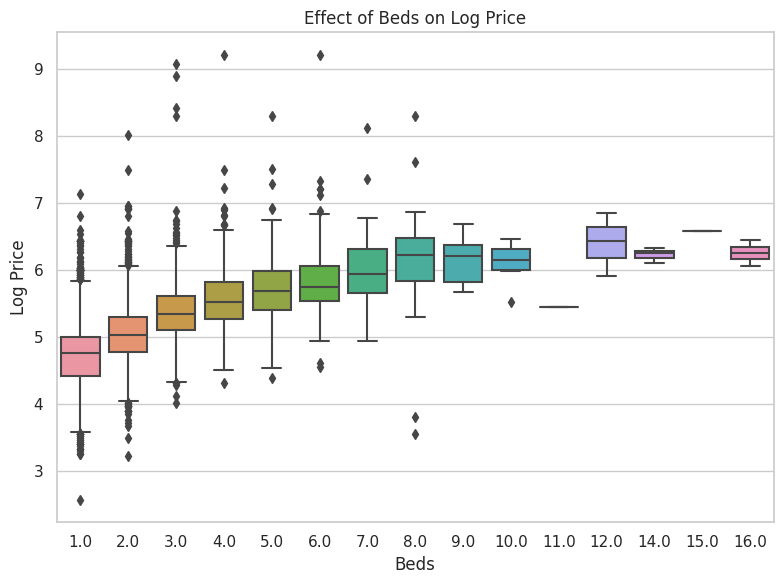

In [233]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='beds', y='log_price')
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.title('Effect of Beds on Log Price')
plt.tight_layout()
plt.show()


<ipython-input-234-2fac18e23660>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


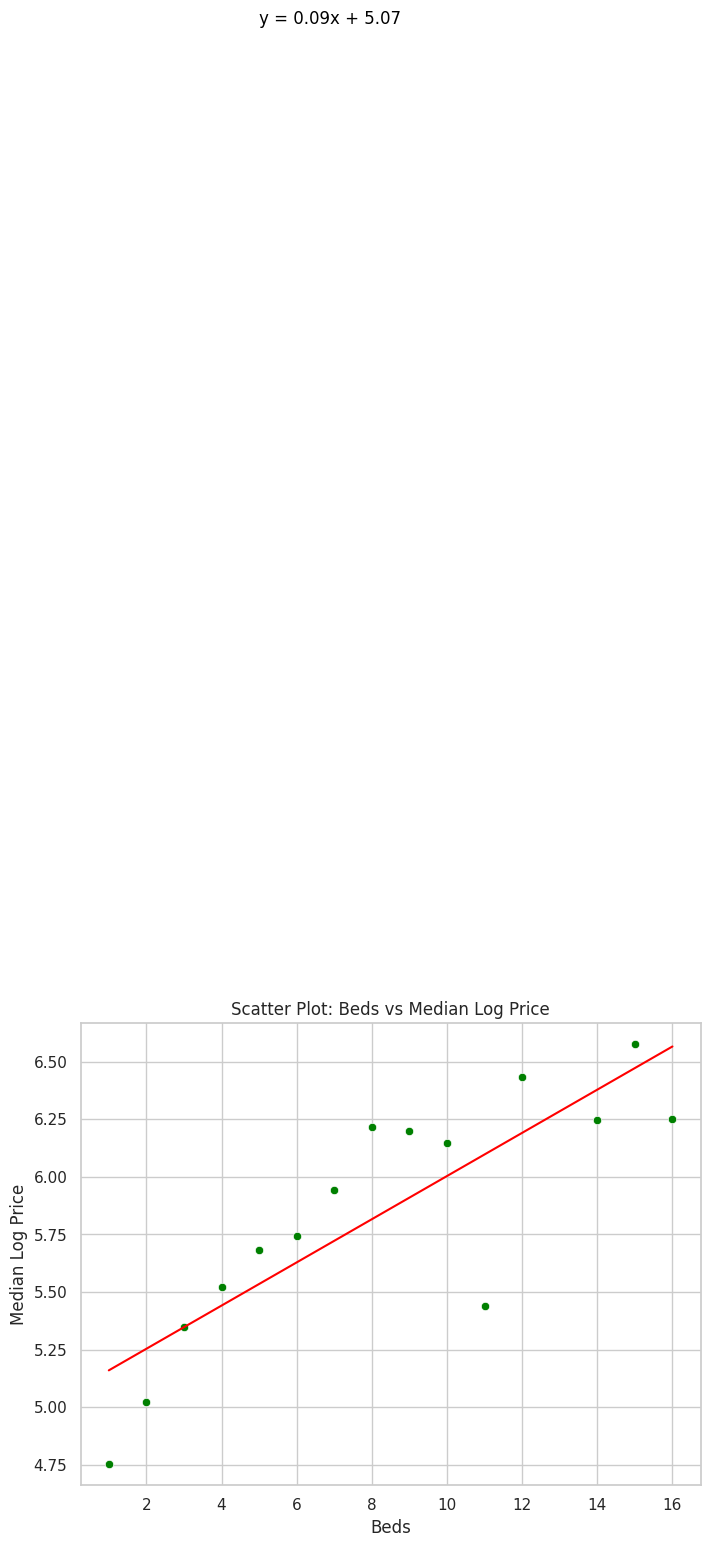

In [234]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median log price for each 'beds' value
median_log_price_beds = clean_df.groupby('beds')['log_price'].median().reset_index()

# Scatter plot of 'beds' against median log price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=median_log_price_beds, x='beds', y='log_price', color='green')
plt.xlabel('Beds')
plt.ylabel('Median Log Price')
plt.title('Scatter Plot: Beds vs Median Log Price')

# Add regression line and equation
regression_beds = np.polyfit(median_log_price_beds['beds'], median_log_price_beds['log_price'], 1)
plt.plot(median_log_price_beds['beds'], np.polyval(regression_beds, median_log_price_beds['beds']), color='red')

# Add equation to the plot
equation_beds = f'y = {regression_beds[0]:.2f}x + {regression_beds[1]:.2f}'
plt.text(5, 11, equation_beds, fontsize=12, color='black')

plt.tight_layout()
plt.show()


<ipython-input-235-3035f8ac5cb9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = grouped_data.pivot('host_since', 'number_of_reviews', 'log_price')


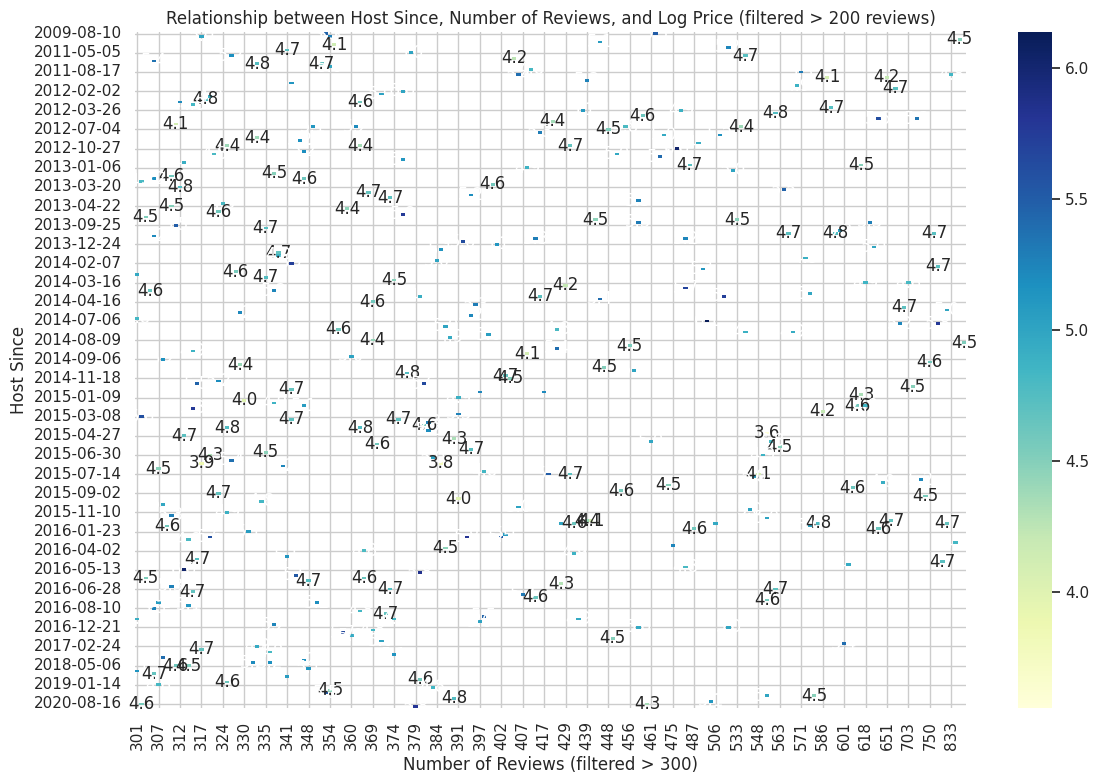

In [235]:
# Filtering data for number_of_reviews greater than 300
filtered_data = clean_df[clean_df['number_of_reviews'] > 300]

# Grouping by 'host_since', 'number_of_reviews', and calculating median 'log_price'
grouped_data = filtered_data.groupby(['host_since', 'number_of_reviews'])['log_price'].median().reset_index()

# Creating a pivot table for better visualization
pivot_table = grouped_data.pivot('host_since', 'number_of_reviews', 'log_price')

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Number of Reviews (filtered > 300)')
plt.ylabel('Host Since')
plt.title('Relationship between Host Since, Number of Reviews, and Log Price (filtered > 300 reviews)')
plt.tight_layout()
plt.show()


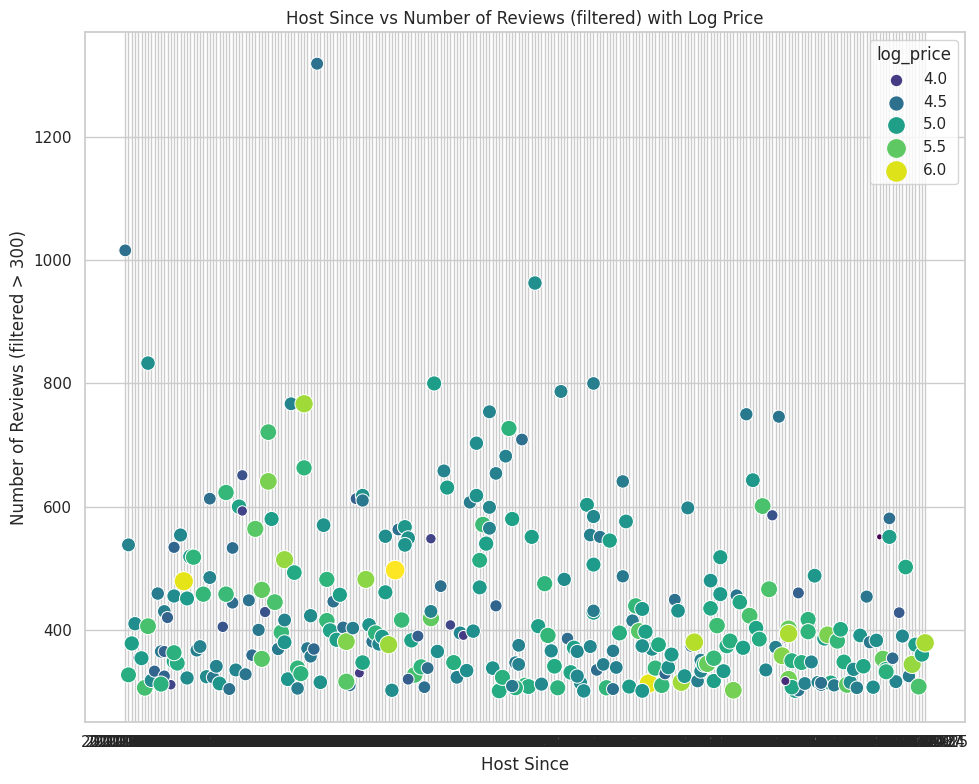

In [236]:
# Filtering data for number_of_reviews greater than 300
filtered_data = clean_df[clean_df['number_of_reviews'] > 300]

# Creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_data, x='host_since', y='number_of_reviews', size='log_price', hue='log_price', palette='viridis', sizes=(20, 200))
plt.xlabel('Host Since')
plt.ylabel('Number of Reviews (filtered > 300)')
plt.title('Host Since vs Number of Reviews (filtered) with Log Price')
plt.tight_layout()
plt.show()


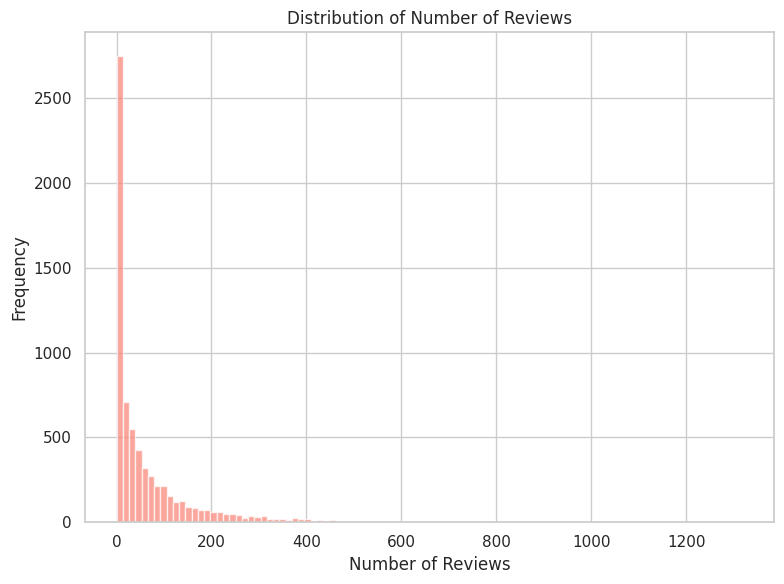

In [237]:
# Creating a histogram for 'number_of_reviews'
plt.figure(figsize=(8, 6))
plt.hist(clean_df['number_of_reviews'], bins=100, color='salmon', alpha=0.7)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')
plt.tight_layout()
plt.show()


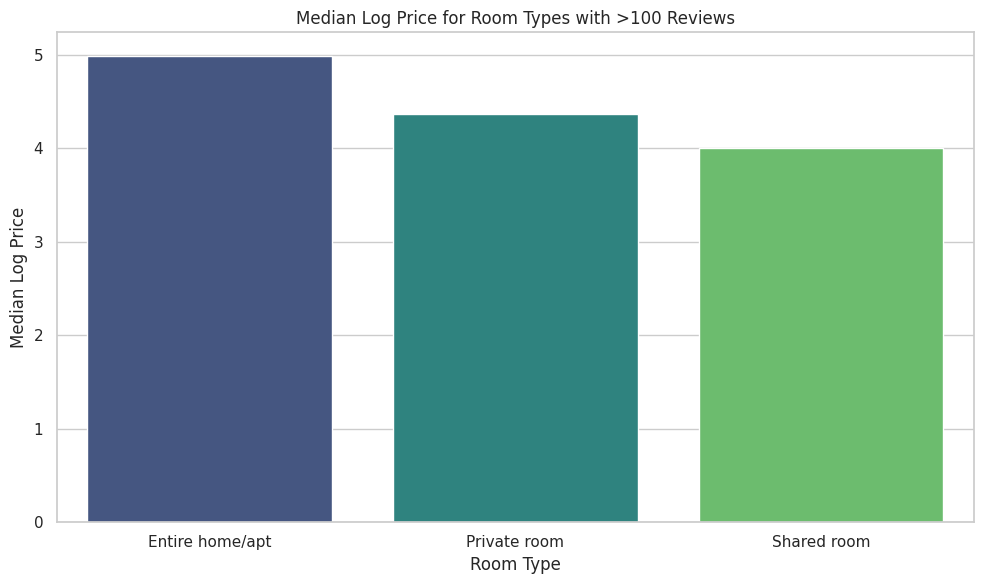

In [238]:
# Filtering data for number_of_reviews greater than 100
filtered_data = clean_df[clean_df['number_of_reviews'] > 100]

# Calculating median log_price for each room_type
median_prices = filtered_data.groupby(['room_type'])['log_price'].median().reset_index()

# Creating a bar plot to show median log_price for each room_type
plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices, x='room_type', y='log_price', palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Median Log Price')
plt.title('Median Log Price for Room Types with >100 Reviews')
plt.tight_layout()
plt.show()


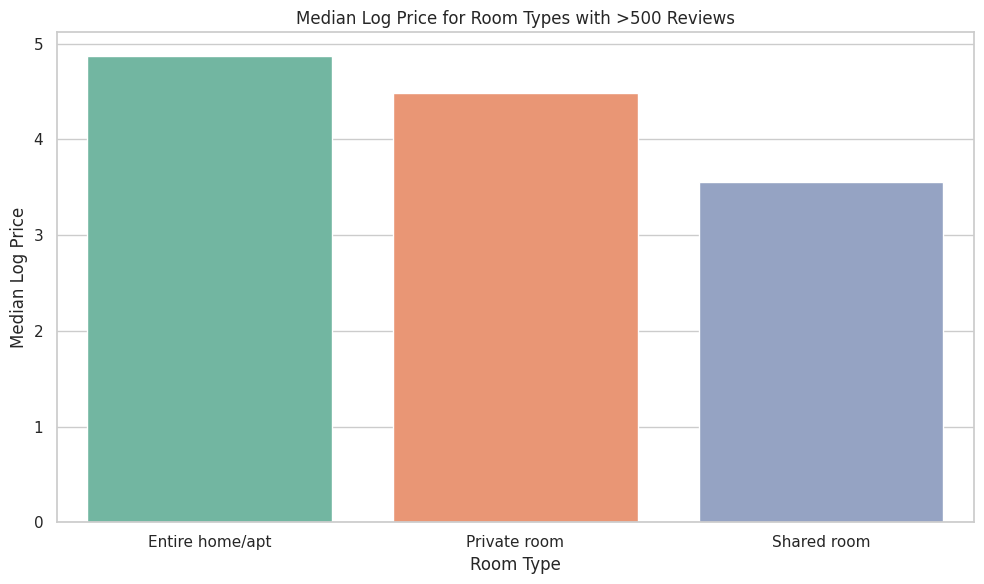

In [239]:
# Filtering data for number_of_reviews greater than 500
filtered_data = clean_df[clean_df['number_of_reviews'] > 500]

# Calculating median log_price for each room_type
median_prices = filtered_data.groupby(['room_type'])['log_price'].median().reset_index()

# Creating a bar plot to show median log_price for each room_type
plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices, x='room_type', y='log_price', palette='Set2')
plt.xlabel('Room Type')
plt.ylabel('Median Log Price')
plt.title('Median Log Price for Room Types with >500 Reviews')
plt.tight_layout()
plt.show()


Entire home.apt has higher listing prices tha private room type

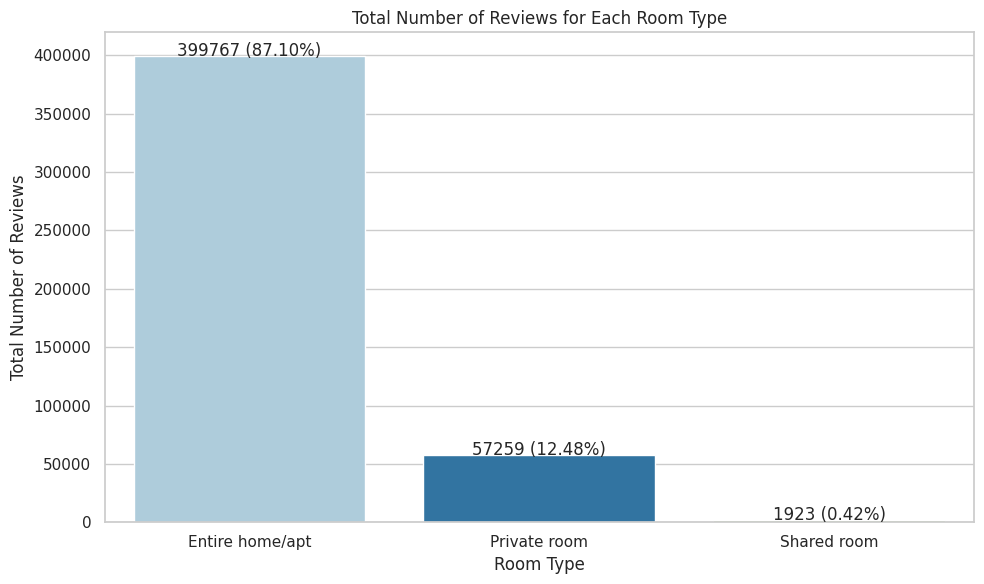

In [240]:
# Grouping data by 'room_type' and calculating the total number of reviews
total_reviews = clean_df.groupby('room_type')['number_of_reviews'].sum().reset_index()

# Creating a bar plot for total number of reviews for each room type
plt.figure(figsize=(10, 6))
sns.barplot(data=total_reviews, x='room_type', y='number_of_reviews', palette='Paired')
plt.xlabel('Room Type')
plt.ylabel('Total Number of Reviews')
plt.title('Total Number of Reviews for Each Room Type')

# Annotating each bar with its value and percentage
for index, row in total_reviews.iterrows():
    plt.text(index, row['number_of_reviews'], f"{row['number_of_reviews']} ({row['number_of_reviews']/total_reviews['number_of_reviews'].sum()*100:.2f}%)", ha='center')

plt.tight_layout()
plt.show()


In [241]:
#Calculate the average 'price' by room type
avg_price = clean_df.groupby("room_type")['price'].mean()
avg_price.head()

room_type
Entire home/apt    209.893138
Private room       111.304912
Shared room         69.062500
Name: price, dtype: float64

In [242]:
# !pip install cartopy
# import cartopy

<Axes: title={'center': 'Room Type Distribution'}, ylabel='room_type'>

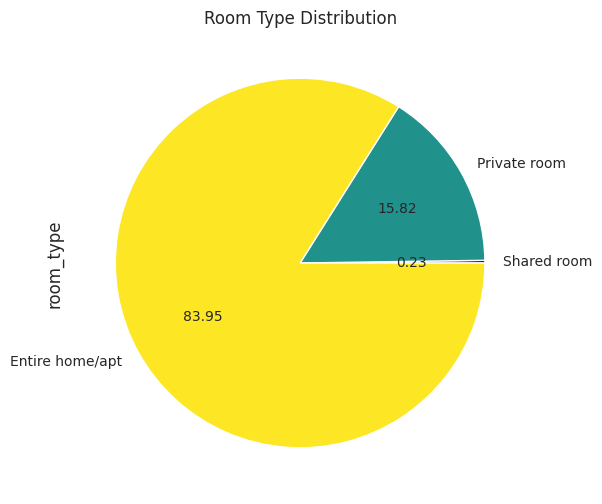

In [243]:
room = clean_df.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y='room_type',
                 cmap='viridis',  # Changing the colormap to 'viridis'
                 figsize=(6, 6),
                 fontsize=10,
                 autopct='%.2f',
                 legend=False,
                 title='Room Type Distribution')


84% is Entire home, 15% is private room and 0.23 is shared room

<Axes: title={'center': 'Property Type Distribution'}>

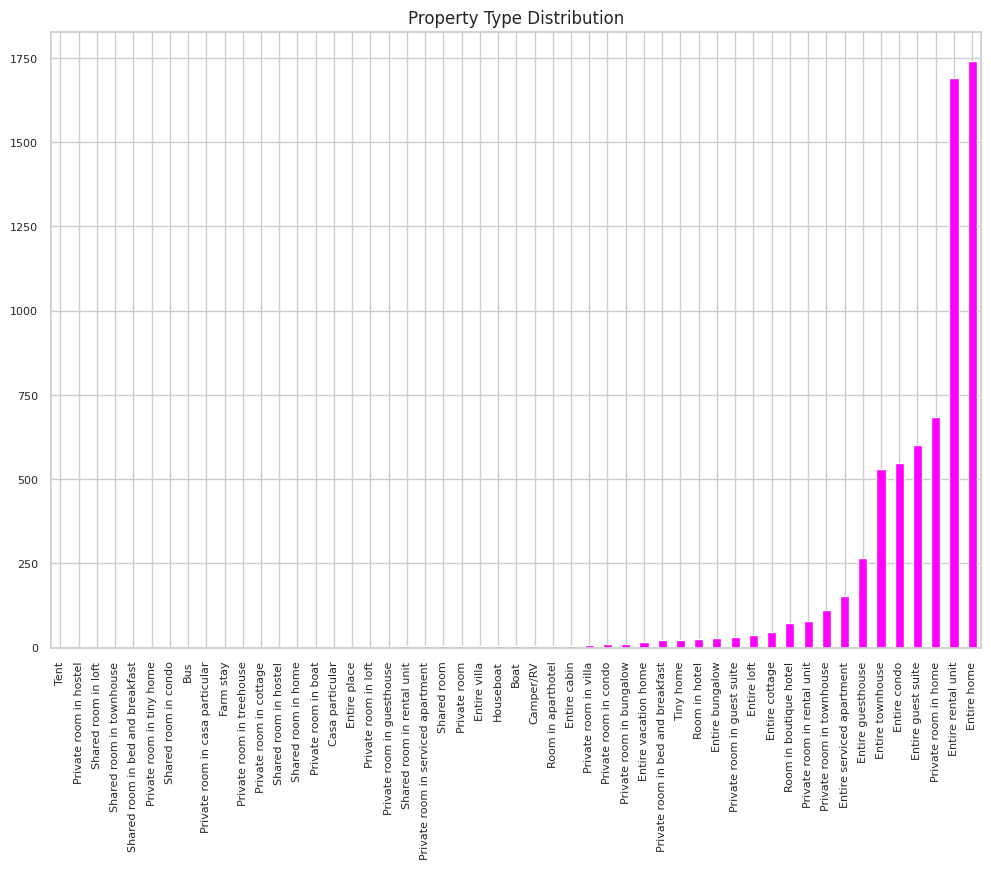

In [244]:
property = clean_df.property_type
p = Counter(property)

property_df = pd.DataFrame.from_dict(p, orient='index').sort_values(by=0)
property_df.columns = ['property_type']
property_df.plot.bar(y='property_type',
                     color='magenta',  # Changing the color to magenta
                     fontsize=8,
                     legend=False,
                     figsize=(12, 8),
                     title="Property Type Distribution")

It appears that entire residences make up roughly 1,700, which is about twice the count of private rooms, approximately 700. Unsurprisingly, apartments and houses dominate the listing count, emphasizing the importance of property and room types in predicting listing prices.

Now let's break property and room type down by price.


In [245]:
prop_room = clean_df[['property_type', 'room_type', 'price']]

# first ten of the table
prop_room[0:10]

,property_type,room_type,price
0,Entire guesthouse,Entire home/apt,99.0
1,Private room in rental unit,Private room,85.0
2,Entire home,Entire home/apt,185.0
3,Entire guest suite,Entire home/apt,155.0
4,Entire rental unit,Entire home/apt,130.0
5,Entire home,Entire home/apt,196.0
6,Entire guest suite,Entire home/apt,89.0
7,Entire home,Entire home/apt,130.0
8,Entire rental unit,Entire home/apt,225.0
9,Entire rental unit,Entire home/apt,75.0


In [246]:
# Grouping by property and room type, and then aggregating them using mean of the price
prop_room_group = clean_df.groupby(['property_type', 'room_type']).mean()

# Resetting the index to turn the lists into a readable table
p = prop_room_group.reset_index()

# Pivoting the table based on the 3 factors, in order
p = p.pivot('property_type', 'room_type', 'price')

# Replacing the NaN values with 0
p.fillna(0.00, inplace=True)

p


<ipython-input-246-b1334ddd490b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prop_room_group = clean_df.groupby(['property_type', 'room_type']).mean()
<ipython-input-246-b1334ddd490b>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  p = p.pivot('property_type', 'room_type', 'price')


room_type,Entire home/apt,Private room,Shared room
property_type,,,
Boat,112.000000,0.000000,0.00
Bus,115.000000,0.000000,0.00
Camper/RV,174.000000,0.000000,0.00
Casa particular,288.666667,0.000000,0.00
Entire bungalow,221.464286,0.000000,0.00
Entire cabin,170.666667,0.000000,0.00
Entire condo,198.147541,0.000000,0.00
Entire cottage,160.456522,0.000000,0.00
Entire guest suite,133.271215,0.000000,0.00


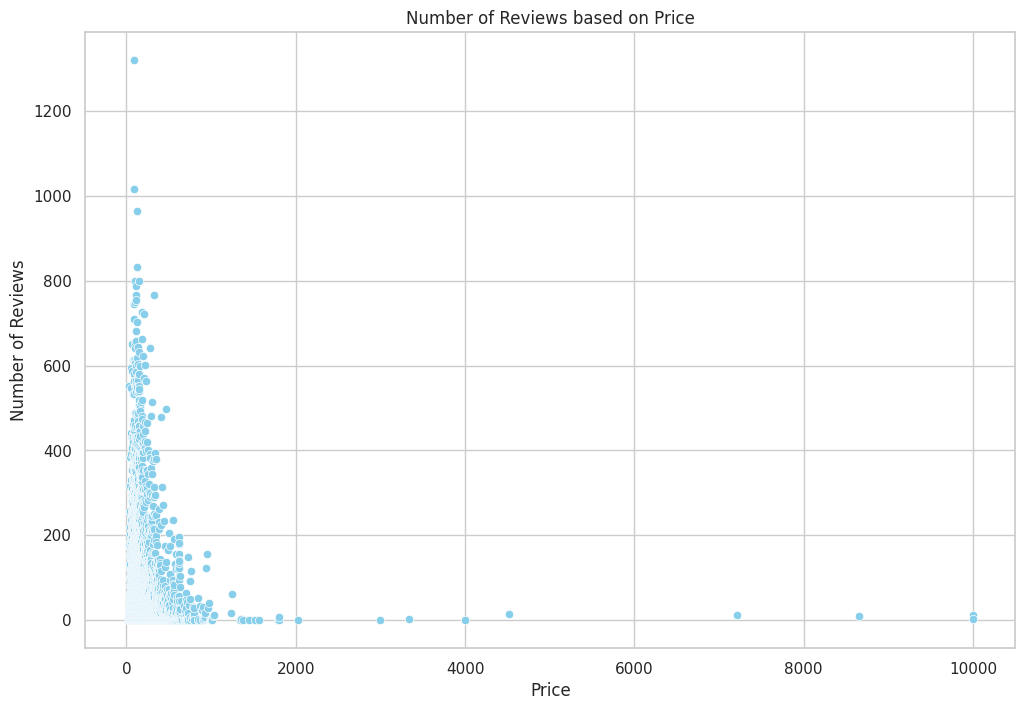

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting values by price
price_review = clean_df[['number_of_reviews', 'price']].sort_values(by='price')

# Creating a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=price_review, x='price', y='number_of_reviews', color='skyblue')
plt.title('Number of Reviews based on Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


#Conclusions


Through data visualization, we review some interesting facts about this dataset.

Absolutely, here's a condensed summary in bullet points based on the discussions, results, and information provided:

- **Price Distribution and Transformation:**
  - The dataset's price distribution ranges from \$13 to \$10,000.
  - Median price is \$150, but the distribution is highly right-skewed.
  - Log transformation was employed due to extreme values, resulting in a mean of approximately $194.

- **Log Price Analysis:**
  - Log price quartiles: Q1 = 4.68, Q2 = 5.01 (median), Q3 = 5.39.
  - Log price IQR is approximately 0.71.

- **Outliers and Pricing:**
  - Outliers were identified using box plots, showing most beyond 1.5x IQR.
  - Price outliers could reflect unique or high-end properties.

- **Property Types and Impact on Prices:**
  - Entire homes and rental units dominate listings, influencing price variations.
  - Higher median prices associated with entire homes and townhouses.
  - The most common property types are entire homes, rental units, and private rooms.

- **Room Types and Price Variances:**
  - Majority (84%) of listings are entire homes, followed by private rooms (15%).
  - In Seattle's Airbnb market, there are around 1,700 entire residences, double the count of private rooms at approximately 700. Apartments and houses dominate, highlighting how property and room types significantly influence predicting listing prices.
  - Shared rooms constitute a minimal portion (0.23%) of listings.
  - Higher listing prices are typically associated with entire homes compared to private rooms.

- **Minimum Nights of Stay:**
  - Minimum nights vary widely from 1 night to a maximum of 700 nights.
  - About 69% of listings have a minimum stay of 7 days or less.
  - Listings with shorter minimum stays (7 days or less) are prevalent.

- **Host Characteristics and Impact on Prices:**
  - Superhosts represent around 46% of listings, influencing trust and service quality.
  - Listings by superhosts might have slightly higher median prices, but non-superhosts have outliers with the highest prices.

- **Review Scores and Pricing:**
  - Review scores range from 1 to 5, predominantly favoring higher ratings (75% at 4.5 or higher).
  - Non-superhost listings exhibit more variability and outliers in review scores compared to superhost listings.

- **Bedrooms, Beds, and Pricing:**
  - Positive correlation observed between the number of bedrooms/beds and higher listing prices.
  - Larger properties with more bedrooms and beds tend to command higher prices due to increased capacity and amenities.

- **Response Time and Pricing:**
  - Properties with hosts responding within an hour show higher listing prices, indicating the perceived value of quick responsiveness.

- **Property Type Influence on Pricing:**
  - Property and room types significantly impact pricing strategies.
  - Entire homes/apartments generally command higher prices compared to private rooms.


  ----------------------------------------

#Additional nuanced details to supplement the insights:

- **Amenities and Pricing:** Certain specific amenities like "wolf stainless steel double oven," "90" HDTV with Apple TV," and "ski-in/ski-out – near ski lifts" are associated with higher median prices, indicating the impact of unique or luxurious amenities on pricing.

- **Accommodation Preferences:** While larger properties tend to have higher prices, the most common accommodation capacity accommodates two guests, suggesting a balance between space and affordability.

- **Non-Linear Relationship:** The correlation between the number of accommodations and log prices appears non-linear. A second-order regression line depicts a plateau in log prices beyond approximately 12 accommodations, indicating a potential saturation point.

- **Response Time and Review Scores:** Although response time might not strongly correlate with pricing, it could influence guest satisfaction. Guests value hosts who respond promptly, potentially impacting positive review scores.

- **Room Type Popularity:** The dominance of entire homes and apartments underscores the popularity of private spaces, potentially influencing pricing strategies by emphasizing privacy and exclusivity.

- **Minimum Stay and Pricing:** While shorter minimum stays are prevalent, there might be a nuanced relationship between minimum stay durations and pricing, especially for stays of 1-7 nights.

These nuances contribute to a more comprehensive understanding of the various factors influencing pricing, guest experiences, and market dynamics within the Seattle Airbnb ecosystem.